<a href="https://colab.research.google.com/github/amarindraa/loan/blob/main/Preprocessing_pd_give_insight(%E2%9C%A8)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#========================================#
#            Import Dependencies         #
#========================================#
import os.path

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
link = 'https://github.com/amarindraa/loan/raw/main/Training%20Data.csv'
df = pd.read_csv(link)

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# Data Preprocessing

In [7]:
# A. Menyamakan Style Pada Kolom
df.rename(columns={'CITY':'City','STATE':'State','CURRENT_JOB_YRS':'Current_Job_Yrs','CURRENT_HOUSE_YRS':'Current_House_Yrs'}, inplace=True)

# B. Split Numerical & Categorical
# List of column names containing numerical data
nums = df.select_dtypes(include='number').drop(columns=['Id', 'Risk_Flag'])

# List of column names containing categorical/object data
cats = df.select_dtypes(include='object').columns.tolist()

# C. Append Uttar Pradesh
df['State'] = df['State'].replace('Uttar_Pradesh[5]', 'Uttar_Pradesh')

# D. Split Risk & Non-Risk

risk0 = df[df['Risk_Flag']==0]
risk1 = df[df['Risk_Flag']==1]



# 1. Data Cleansing

In [8]:
# A. Handling Missing Values
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
City                 0
State                0
Current_Job_Yrs      0
Current_House_Yrs    0
Risk_Flag            0
dtype: int64

In [9]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
City                 0
State                0
Current_Job_Yrs      0
Current_House_Yrs    0
Risk_Flag            0
dtype: int64

In [10]:
# B. Hanglind Dubplicated Data
df.duplicated().sum()

0

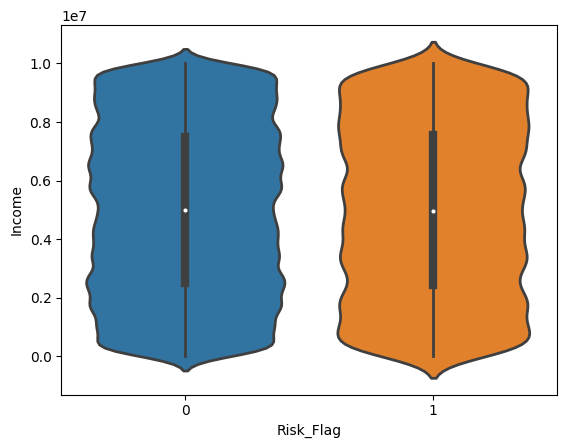

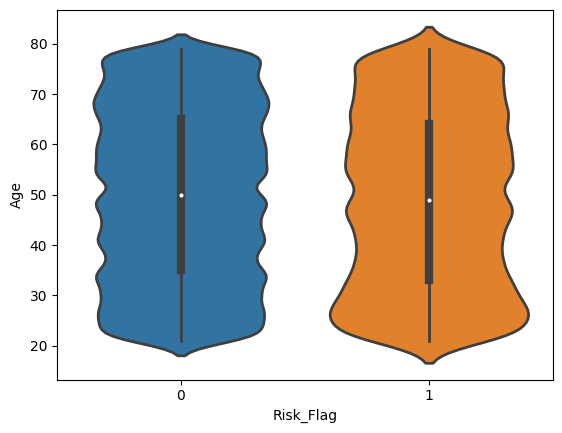

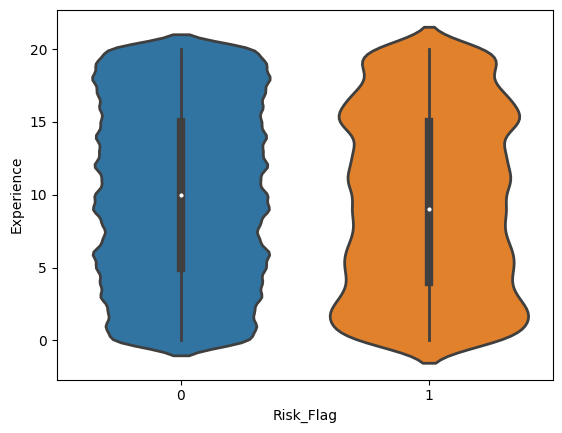

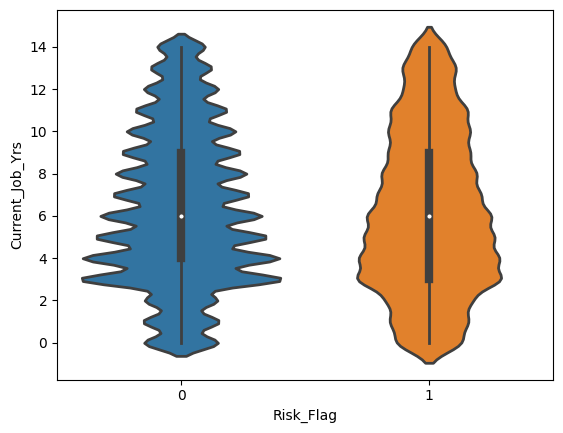

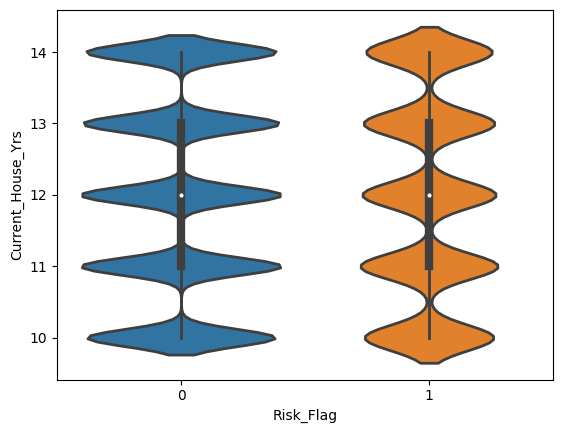

In [11]:
# C. Handling Outliers

for column in nums[::1]:
    sns.violinplot(data=df, y=column, x='Risk_Flag', linewidth=2, orient='v')
    plt.show()

In [12]:

# D. Feature Transformation / menghandle outlier (z-score, log-transform)
# E. Feature Encoding (One-Hot Encoding, categorical menjadi numerical)
# F. Handle Class Imbalance ( SMOTE )

# tidak dilakukan Feature Transformation, Feature Encoding, Handle Class Imbalance karena akan dilakukan model yang robust terhadap outlier
# dan melakukan proses scorecard yang umum dipakai dalam dunia Perbankan & Fintech

# 2. Feature Engineering

<Axes: >

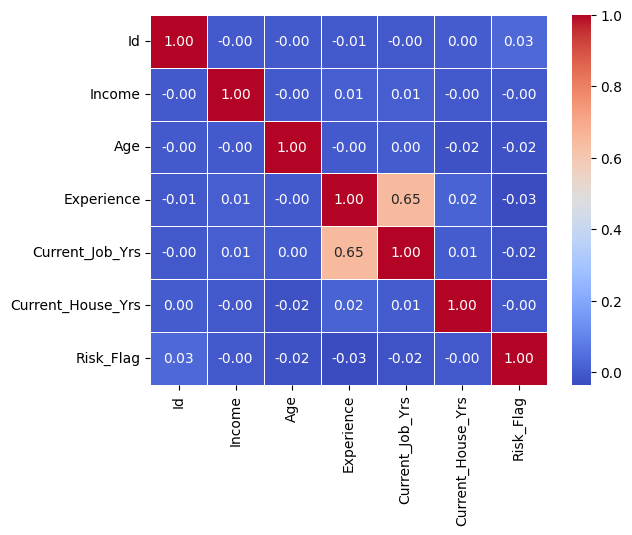

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [14]:
# A. Feature Selection (membuang feature yang kurang relevan atau redundan)

# dalam heatmap dengan target Risk_Flag, fitur Current_House_Yrs & Current_Job_Yrs redundan, namun karena fitur sangat sedikit dan
# predictive model yang digunakan menggunakan scorecard yang memberikan valuasi berbeda dengan sns.heatmap.
# Scorecard adalah alat yang digunakan dalam industri keuangan dan kredit untuk menilai risiko kredit seseorang atau entitas.

In [15]:
# B. Feature extraction (mengurangi feature)
# tidak ada, karena City yang memiliki 317 unique terwakili oleh State yang hanya 28 unique.

In [21]:
print(f'Jumlah City:', df['City'].nunique())
print(f'Jumlah State:', df['State'].nunique() )

Jumlah City: 317
Jumlah State: 28


In [17]:
# C. 4 Feature tambahan :

# a. Job Duration Categorical
# b. Experience Categorial
# c. Income Categorical
# d. Age Categorical



# Job Duration Categorical
conditions = [
    df['Current_Job_Yrs'] <= 3,
    (df['Current_Job_Yrs'] > 3) & (df['Current_Job_Yrs'] <= 6),
    (df['Current_Job_Yrs'] > 6) & (df['Current_Job_Yrs'] <= 9),
    (df['Current_Job_Yrs'] > 9) & (df['Current_Job_Yrs'] <= 14)
]

choices = ['0-3', '4-6', '7-9', '10-14']

df['Job_Duration_cat'] = np.select(conditions, choices, default='>14')


# Experience Categorical
conditions = [
    df['Experience'] <= 5,
    (df['Experience'] > 5) & (df['Experience'] <= 10),
    (df['Experience'] > 10) & (df['Experience'] <= 15)
]

choices = ['0-5', '6-10', '11-15']

df['Experience_cat'] = np.select(conditions, choices, default='>15')


# Income Categorical
conditions = [
    df['Income'] <= 2500000,
    (df['Income'] > 2500000) & (df['Income'] <= 5000000),
    (df['Income'] > 5000000) & (df['Income'] <= 7500000)
]

choices = ['a.<2,5m', 'b.2,5m - 5m', 'c.5m - 7,5m']

df['Income_cat'] = np.select(conditions, choices, default='d.>7,5m')


# Age Categorical
conditions = [
    df['Age'] <= 35,
    (df['Age'] > 35) & (df['Age'] <= 50),
    (df['Age'] > 50) & (df['Age'] <= 65)
]

choices = ['21-34', '35-49', '50-64']

df['Age_cat'] = np.select(conditions, choices, default='65-79')



In [29]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Yrs,Current_House_Yrs,Risk_Flag,Job_Duration_cat,Experience_cat,Income_cat,Age_cat
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0-3,0-5,"a.<2,5m",21-34
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,7-9,6-10,"d.>7,5m",35-49
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,4-6,0-5,"b.2,5m - 5m",65-79
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0-3,0-5,"c.5m - 7,5m",35-49
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0-3,11-15,"c.5m - 7,5m",35-49


In [31]:
#Relisting & Resplitting

# List of column names containing numerical data
nums = df.select_dtypes(include='number').drop(columns=['Id', 'Risk_Flag'])

# List of column names containing categorical/object data
cats = df.select_dtypes(include='object').columns.tolist()

# Split Risk & Non-Risk

risk0 = df[df['Risk_Flag']==0]
risk1 = df[df['Risk_Flag']==1]

## Deep Analysis

### Jumlah City, Good & Default Customer pada State

In [33]:
print("Jumlah City, Perbandingan Good & Bad Customer dalam State:")
#print(df.groupby('State')['City'].nunique().sort_values(ascending=False))
State_City = df.groupby('State')['City'].nunique().sort_values(ascending=False)
State_Risk0 = risk0.groupby('State')['Id'].nunique()
State_Risk1 = risk1.groupby('State')['Id'].nunique()

State_Pops = pd.concat([State_City, State_Risk0], axis=1, join="inner")
State_Pops.rename(columns={'Id':'Good_Cust'}, inplace=True)
State_Pops = pd.concat([State_Pops, State_Risk1], axis=1, join="inner")
State_Pops.rename(columns={'Id':'Deft_Cust'}, inplace=True)
State_Pops['%Ratio']= (100 * (State_Pops['Deft_Cust']))/(State_Pops['Good_Cust'] + State_Pops['Deft_Cust'])
State_Pops


Jumlah City, Perbandingan Good & Bad Customer dalam State:


,City,Good_Cust,Deft_Cust,%Ratio
State,,,,
Uttar_Pradesh,36,25703,3440,11.803864
Andhra_Pradesh,32,22362,2935,11.602166
Maharashtra,32,22667,2895,11.325405
West_Bengal,29,20474,3009,12.813525
Bihar,25,17197,2583,13.058645
Tamil_Nadu,21,14831,1706,10.316261
Madhya_Pradesh,18,11942,2180,15.436907
Karnataka,15,10666,1189,10.029523
Gujarat,14,10065,1343,11.772440
